In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Evaluate customer dataset
# Lets load the data
customers_data = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv")
customers_data.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
# How many total records are in the table?
customers_data_shape = customers_data.shape
customers_data_shape

(99441, 5)

In [5]:
# How many unique customers are there?
unique_customers = len(customers_data["customer_unique_id"].unique())
unique_customers

96096

In [6]:
# List all distinct states (customer_state) in the dataset.
distinct_states = customers_data["customer_state"].unique()
distinct_states

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

In [7]:
# How many customers are there in each state?
customer_in_each_state = (
    customers_data.groupby("customer_state")[["customer_id"]]
    .count()
    .reset_index()
)

customer_in_each_state.columns = ["customer_state", "customer_counts"]
customer_in_each_state.head(10)

,customer_state,customer_counts
0,AC,81
1,AL,413
2,AM,148
3,AP,68
4,BA,3380
5,CE,1336
6,DF,2140
7,ES,2033
8,GO,2020
9,MA,747


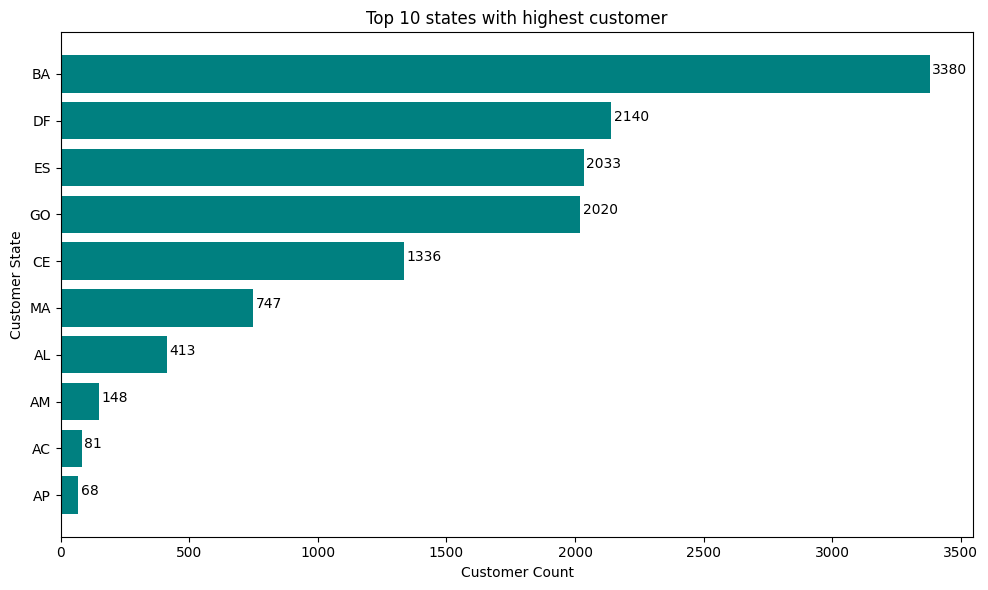

In [8]:
top_10_state_customer_count = customer_in_each_state.head(10).sort_values("customer_counts", ascending = True)
plt.figure(figsize = (10, 6))
plt.barh(
    y = top_10_state_customer_count["customer_state"],
    width = top_10_state_customer_count["customer_counts"],
    color = "teal"
)
for index, value in enumerate(top_10_state_customer_count["customer_counts"]):
    plt.text(value + 10, index, str(value))
plt.title("Top 10 states with highest customer")
plt.xlabel("Customer Count")
plt.ylabel("Customer State")
plt.tight_layout()
plt.show()

In [9]:
# Which cities have the most customers?
customer_with_cities = (
    customers_data.groupby("customer_city")["customer_unique_id"]
    .nunique()
    .reset_index()
    .rename(columns = {"customer_unique_id": "unique_customer_counts"})
    .sort_values("unique_customer_counts", ascending = False)
)
# lets see the first 10 higest customers in each city
customer_with_cities.head(10)

,customer_city,unique_customer_counts
3597,sao paulo,14984
3155,rio de janeiro,6620
453,belo horizonte,2672
558,brasilia,2069
1143,curitiba,1465
707,campinas,1398
2964,porto alegre,1326
3247,salvador,1209
1529,guarulhos,1153
3428,sao bernardo do campo,908


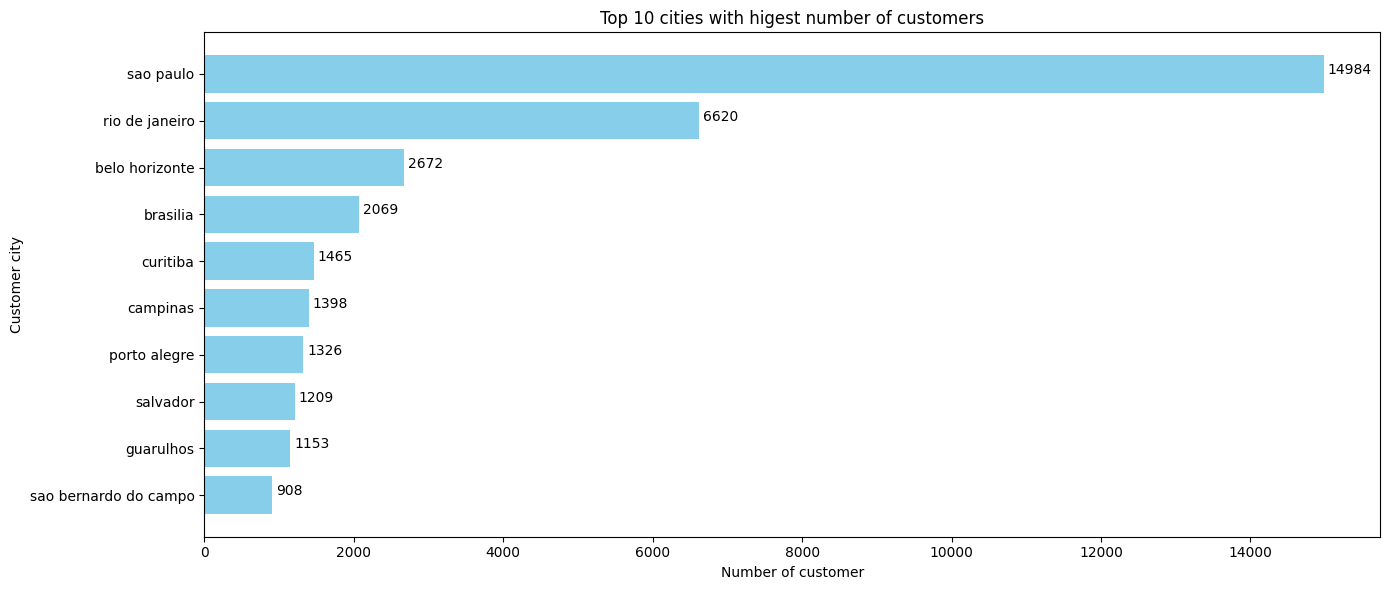

In [10]:
# lets plot top 10 cities customer
top_10_cities_customer_count = customer_with_cities.head(10).sort_values("unique_customer_counts", ascending = True)
plt.figure(figsize = (14, 6))
plt.barh(
    y = top_10_cities_customer_count["customer_city"],
    width = top_10_cities_customer_count["unique_customer_counts"],
    color = "skyblue"
)
for index, value in enumerate(top_10_cities_customer_count["unique_customer_counts"]):
    plt.text(value + 50, index, str(value))
plt.title("Top 10 cities with higest number of customers")
plt.xlabel("Number of customer")
plt.ylabel("Customer city")
plt.tight_layout()
plt.show()

In [11]:
# How many customers are from the city of "sao paulo"?
customer_from_particular_city = (
    customers_data[customers_data["customer_city"] == "sao paulo"]
    .groupby("customer_city")["customer_unique_id"]
    .nunique()
    .sum()
)
customer_from_particular_city

14984

In [12]:
# What’s the most common zip code prefix?
most_common_zip_code = customers_data["customer_zip_code_prefix"].value_counts().reset_index()
most_common_zip_code

,customer_zip_code_prefix,count
0,22790,142
1,24220,124
2,22793,121
3,24230,117
4,22775,110
...,...,...
14989,35698,1
14990,99370,1
14991,64808,1
14992,60876,1


In [13]:
# How many unique cities are in each state?
unique_cities_in_each_state = (
    customers_data.groupby("customer_state")["customer_city"]
    .nunique()
    .reset_index()
    .rename(columns = {"customer_city": "unique_city_count"})
    .sort_values("unique_city_count", ascending = False)
)
# sum all unique_city_count
total = unique_cities_in_each_state["unique_city_count"].sum()
print(f"Unique City Count In Each State: {unique_cities_in_each_state.head(10)}\n")
print(f"Total Unique Cities in Each State: {total}")

Unique City Count In Each State:    customer_state  unique_city_count
10             MG                745
25             SP                629
22             RS                379
17             PR                364
4              BA                353
23             SC                240
8              GO                178
5              CE                161
15             PE                152
18             RJ                149

Total Unique Cities in Each State: 4310


In [14]:
# How many customers live in zip code prefix 9790?
customer_in_zip_9790 = customers_data[customers_data["customer_zip_code_prefix"] == 9790]["customer_unique_id"].nunique()
customer_in_zip_9790

19

In [15]:
# Which states have more than 1,000 customers?
states_more_than_1000_cus = (
    customers_data.groupby("customer_state")["customer_unique_id"]
    .nunique()
    .reset_index()
    .rename(columns = {"customer_unique_id": "customer_count_per_state"})
    .sort_values("customer_count_per_state", ascending = False)
)
states_more_than_1000_cus = states_more_than_1000_cus[states_more_than_1000_cus["customer_count_per_state"] > 1000]
states_more_than_1000_cus

,customer_state,customer_count_per_state
25,SP,40302
18,RJ,12384
10,MG,11259
22,RS,5277
17,PR,4882
23,SC,3534
4,BA,3277
6,DF,2075
7,ES,1964
8,GO,1952


In [16]:
# Which zip code prefixes have more than 50 customers?
zip_code_more_than_50_cus = (
    customers_data.groupby("customer_zip_code_prefix")["customer_unique_id"]
    .nunique()
    .reset_index()
    .rename(columns = {"customer_unique_id": "unique_customer_count"})
    .sort_values("unique_customer_count", ascending = False)
)
zip_code_more_than_50_cus = zip_code_more_than_50_cus[zip_code_more_than_50_cus["unique_customer_count"] > 50]
zip_code_more_than_50_cus.tail(10)

,customer_zip_code_prefix,unique_customer_count
7065,30190,52
6824,29090,52
7080,30320,52
5711,21330,51
5869,22743,51
7561,35519,51
3669,9371,51
7078,30310,51
7980,37550,51
5858,22710,51


In [17]:
# Find all customers whose city starts with “rio”.
rio_customer = customers_data[customers_data["customer_city"].str.lower().str.startswith("rio")]
rio_customer = rio_customer["customer_unique_id"]
rio_customer.unique(), rio_customer.nunique()

(array(['2a46fb94aef5cbeeb850418118cee090',
        '5c2991dbd08bbf3cf410713c4de5a0b5',
        '3da7750bf3c1dbd724624a60a9f5942b', ...,
        '81720bfb69887fe95390723af9748e9f',
        'ce13190d9ef1e855dc50ecea9a1ef809',
        'd111b06b6f3a2add0d2241325f65b5ca'], dtype=object),
 7429)

In [18]:
# What are the top 5 states by number of unique customers?
states_more_than_1000_cus.head(5)

,customer_state,customer_count_per_state
25,SP,40302
18,RJ,12384
10,MG,11259
22,RS,5277
17,PR,4882


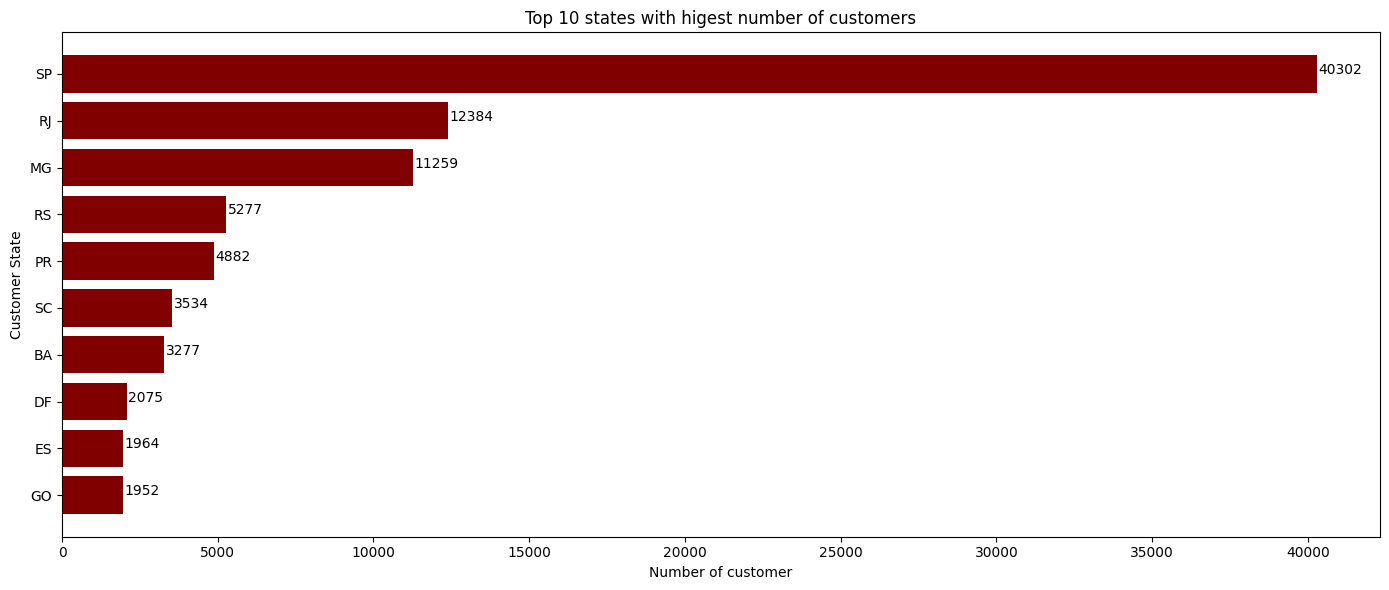

In [19]:
# lets plot top 10 cities customer
states_more_than_1000_cus = states_more_than_1000_cus.head(10).sort_values("customer_count_per_state", ascending = True)
plt.figure(figsize = (14, 6))
plt.barh(
    y = states_more_than_1000_cus["customer_state"],
    width = states_more_than_1000_cus["customer_count_per_state"],
    color = "maroon"
)
for index, value in enumerate(states_more_than_1000_cus["customer_count_per_state"]):
    plt.text(value + 50, index, str(value))
plt.title("Top 10 states with higest number of customers")
plt.xlabel("Number of customer")
plt.ylabel("Customer State")
plt.tight_layout()
plt.show()

In [20]:
# Which city has the highest number of duplicate customers (same unique ID)?
customer_dupes = (
    customers_data.groupby(["customer_city", "customer_unique_id"])
    .size()
    .reset_index(name = "count")
)
duplicate_customer = customer_dupes[customer_dupes["count"] > 1]

duplicates_per_city = (
    duplicate_customer.groupby("customer_city")["customer_unique_id"]
    .nunique()
    .reset_index(name = "duplicate_customer_count")
    .sort_values("duplicate_customer_count", ascending = False)
)
duplicates_per_city.head(10)

,customer_city,duplicate_customer_count
675,sao paulo,502
592,rio de janeiro,236
93,belo horizonte,92
113,brasilia,60
212,curitiba,44
558,porto alegre,42
136,campinas,41
278,guarulhos,34
609,salvador,33
462,niteroi,33


In [21]:
# How many customer_unique_ids appear more than once?
duplicate_counts = customers_data["customer_unique_id"].value_counts()
duplicate_counts = duplicate_counts[duplicate_counts > 1]
duplicate_counts.head(10)

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
63cfc61cee11cbe306bff5857d00bfe4     6
47c1a3033b8b77b3ab6e109eb4d5fdf3     6
12f5d6e1cbf93dafd9dcc19095df0b3d     6
de34b16117594161a6a89c50b289d35a     6
dc813062e0fc23409cd255f7f53c7074     6
Name: count, dtype: int64

In [22]:
# List all cities that have customers with more than 1 zip code prefix.
customer_with_unique_zip = (
    customers_data.groupby(["customer_city", "customer_unique_id"])["customer_zip_code_prefix"]
    .nunique()
    .reset_index(name = "unique_zip_count")
)
customer_with_unique_zip = customer_with_unique_zip[customer_with_unique_zip["unique_zip_count"] > 1]
multi_zip_cities = (
    customer_with_unique_zip.groupby("customer_city")["customer_unique_id"]
    .nunique()
    .reset_index()
    .rename(columns={"customer_unique_id": "duplicate_customers_count"})
    .sort_values("duplicate_customers_count", ascending = False)
)
multi_zip_cities.head(10)

,customer_city,duplicate_customers_count
48,sao paulo,29
41,rio de janeiro,22
7,belo horizonte,9
34,osasco,4
59,vila velha,4
8,brasilia,3
42,salvador,2
11,campinas,2
55,uba,2
38,praia grande,2


In [23]:
# Which cities exist in multiple states? (e.g., same name in different states)
cities_in_multi_states = (
    customers_data.groupby("customer_city")["customer_state"]
    .nunique()
    .reset_index(name = "states_count")
)
cities_in_multi_states["customer_city"].head(10)

0    abadia dos dourados
1              abadiania
2                 abaete
3             abaetetuba
4                abaiara
5                 abaira
6                  abare
7                 abatia
8          abdon batista
9           abelardo luz
Name: customer_city, dtype: object

In [24]:
# How many customers are in cities containing "paulo"?
customers_in_paulo_cities = customers_data[customers_data["customer_city"]
    .str.lower().str.contains("paulo")]["customer_unique_id"].nunique()
customers_in_paulo_cities

15049

In [25]:
# What percentage of customers come from "SP"?
total_customers = customers_data.shape[0]
customers_from_SP = customers_data[customers_data["customer_state"] == "SP"].value_counts().sum()
percentage_from_SP = np.round((customers_from_SP / total_customers) * 100)
percentage_from_SP

42.0

In [26]:
# Find the city with the highest number of repeated customers (i.e., same unique ID appears multiple times).
cities_customer_counts = (
    customers_data.groupby(["customer_city", "customer_unique_id"])
    .size()
    .reset_index(name = "counts")
)
repeated_customers = cities_customer_counts[cities_customer_counts["counts"] > 1]

repeated_by_city = (
    repeated_customers.groupby("customer_city")["customer_unique_id"]
    .nunique()
    .reset_index(name="repeated_customer_count")
    .sort_values(by="repeated_customer_count", ascending = False)
)
repeated_by_city.head(10)

,customer_city,repeated_customer_count
675,sao paulo,502
592,rio de janeiro,236
93,belo horizonte,92
113,brasilia,60
212,curitiba,44
558,porto alegre,42
136,campinas,41
278,guarulhos,34
609,salvador,33
462,niteroi,33


In [27]:
# Rank cities within each state by number of customers.
city_customer_counts = (
    customers_data.groupby(["customer_state", "customer_city"])["customer_unique_id"]
    .nunique()
    .reset_index(name = "customer_count")
)
city_customer_counts["city_rank"] = (
    city_customer_counts
    .sort_values(["customer_state", "customer_count"], ascending = [True, False])
    .groupby("customer_state")
    .rank(method = "dense", ascending = False)["customer_count"]
)
city_customer_counts.sort_values(["customer_state", "city_rank"]).head(10)

,customer_state,customer_city,customer_count,city_rank
5,AC,rio branco,66,1.0
1,AC,cruzeiro do sul,3,2.0
6,AC,senador guiomard,2,3.0
7,AC,xapuri,2,3.0
0,AC,brasileia,1,4.0
2,AC,epitaciolandia,1,4.0
3,AC,manoel urbano,1,4.0
4,AC,porto acre,1,4.0
36,AL,maceio,243,1.0
10,AL,arapiraca,28,2.0


In [28]:
# Detect and list customers (by customer_unique_id) who appear more than once with different cities.
customer_in_different_city = (
    customers_data.groupby("customer_unique_id")["customer_city"]
    .nunique()
    .reset_index()
)
customer_in_different_city = customer_in_different_city[customer_in_different_city["customer_city"] > 1]
duplicate_ids = customer_in_different_city["customer_unique_id"].tolist()[:10]
duplicate_ids

['0178b244a5c281fb2ade54038dd4b161',
 '08fb46d35bb3ab4037202c23592d1259',
 '09d74edf20acb4f9523fb1cf19a18456',
 '0ceb502fc33a2ad327b08288c5310e2e',
 '11b47516f8f6a42105b9807903ede333',
 '133e20311ec257bda38f1798250d38c5',
 '13abc50b97af7425b5066e405d7cd760',
 '1f90117a847636892e3c5bf569f2ac68',
 '2410195f6521688005612363835a2671',
 '2b19910e856b2ba3e7257e63a093a3df']

In [29]:
# Create a summary table: state, total customers, unique cities, average zip code prefix.
summary = (
    customers_data.groupby("customer_state")
    .agg(
        total_customers = ("customer_unique_id", "nunique"),
        unique_cities = ("customer_city", "nunique"),
        average_zip_prefix = ("customer_zip_code_prefix", "mean")
    )
    .reset_index()
    .sort_values(by = "total_customers", ascending = False)
)
summary["average_zip_prefix"] = summary["average_zip_prefix"].round(2)
summary.head(10)

,customer_state,total_customers,unique_cities,average_zip_prefix
25,SP,40302,629,9250.36
18,RJ,12384,149,23964.84
10,MG,11259,745,35211.34
22,RS,5277,379,94748.40
17,PR,4882,364,84251.64
23,SC,3534,240,88818.53
4,BA,3277,353,44102.13
6,DF,2075,6,71665.66
7,ES,1964,95,29297.30
8,GO,1952,178,74992.57


In [30]:
# Show the top 3 zip code prefixes per state by number of customers.
zip_customer_counts = (
    customers_data.groupby(["customer_state", "customer_zip_code_prefix"])["customer_unique_id"]
    .nunique()
    .reset_index(name = "customer_count")
)

# Step 2: Sort by state and customer count (descending)
zip_customer_counts = zip_customer_counts.sort_values(["customer_state", "customer_count"], ascending=[True, False])
zip_customer_counts["zip_rank"] = zip_customer_counts.groupby("customer_state").cumcount() + 1
top_3_zip_codes = zip_customer_counts[zip_customer_counts["zip_rank"] <= 3]
top_3_zip_codes.head(10)

,customer_state,customer_zip_code_prefix,customer_count,zip_rank
11,AC,69918,13,1
0,AC,69900,12,2
1,AC,69901,8,3
28,AL,57035,38,1
39,AL,57046,16,2
42,AL,57052,12,3
159,AM,69037,8,1
150,AM,69020,6,2
169,AM,69050,6,3
201,AP,68900,12,1


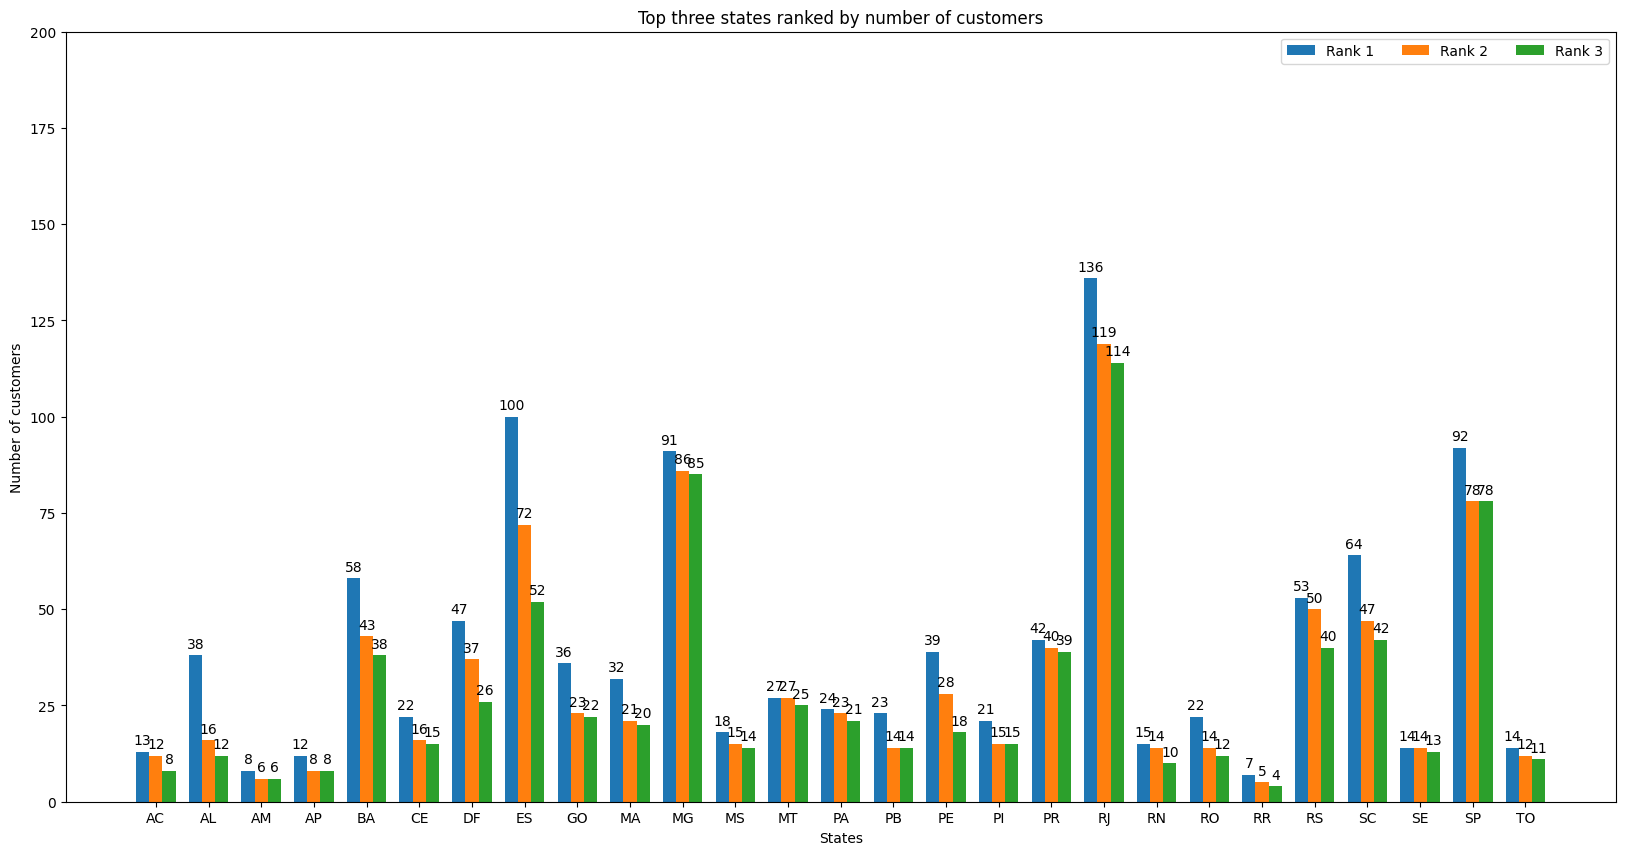

In [31]:
# Draw a group bar chart
zips = top_3_zip_codes["customer_state"].unique()
rankwise_customer = {}
for i in range(3):
    rankwise_customer[i+1] = top_3_zip_codes[top_3_zip_codes["zip_rank"] == i + 1]["customer_count"].to_numpy()

x = np.arange(len(zips))

width = 0.25
multipier = 0

fig, axes = plt.subplots(figsize = (20, 10))

for rank, customer in rankwise_customer.items():
    offset = width * multipier
    rects = axes.bar(x + offset, customer, width, label=f"Rank {rank}")
    axes.bar_label(rects, padding = 3)
    multipier += 1
axes.set_title("Top three states ranked by number of customers")
axes.set_xlabel("States")
axes.set_ylabel("Number of customers")
axes.set_xticks(x + width, zips)
axes.legend(loc = "upper right", ncols = 3)
axes.set_ylim(0, 200)
plt.show()

In [32]:
# What is the average number of customers per city within each state?
# per city - grouping needed
# each state - grouping needed
customer_count = (
    customers_data.groupby(["customer_state", "customer_city"])["customer_unique_id"]
    .nunique()
    .reset_index(name="city_customer_count")
)

avg_customer_per_city = (
    customer_count.groupby("customer_state")["city_customer_count"]
    .mean()
    .reset_index(name = "average_customer_count")
)

avg_customer_per_city["average_customer_count"] = avg_customer_per_city["average_customer_count"].round(2)

avg_customer_per_city.head(10)

,customer_state,average_customer_count
0,AC,9.62
1,AL,5.91
2,AM,28.60
3,AP,11.17
4,BA,9.29
5,CE,8.16
6,DF,346.00
7,ES,20.68
8,GO,10.97
9,MA,5.95


In [33]:
# Find customers whose zip code prefix is shared with customers from another state (rare case).
zip_states = (
    customers_data.groupby("customer_zip_code_prefix")["customer_state"]
    .nunique()
    .reset_index(name = "state_count")
)
shared_zips = zip_states[zip_states["state_count"] > 1]["customer_zip_code_prefix"]
suspicous_customers = customers_data[customers_data["customer_zip_code_prefix"].isin(shared_zips)]
suspicous_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
